In [1]:
import time
time.ctime()

'Fri Oct 13 15:16:33 2023'

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il
import glob
import itertools as it
import random
import warnings
import collections
import dill

from scipy import optimize


%load_ext ipydex.displaytools
%matplotlib inline


In [3]:
import stage_2a_bar_selection as bs
il.reload(bs)
from stage_2a_bar_selection import (
    load_img,
    rgb,
    get_bbox_list,
    assign_row_col,
    index_combinations,
    find_missing_boxes,
    handle_missing_boxes,
    select_bar_from_file,
    get_raw_cell,
    get_angle,
    correct_angle,
    rotate_img,
    Container,
)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
vv = {"vmin": 0, "vmax": 255}


In [4]:
img_dir = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0"
img_path_list = glob.glob(f"{img_dir}/*.jpg")
img_path_list.sort()

hist_dict_path = "dicts"
total_res_fpath = f"{hist_dict_path}/_total_res.dill"
hist_dict_list = glob.glob(f"{hist_dict_path}/hist_*.dill")
hist_dict_list.sort()

/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-21-53_C50.jpg ('a', '6') 7.70017410755757


(dc.criticality_container.score) := 7.70017410755757

---

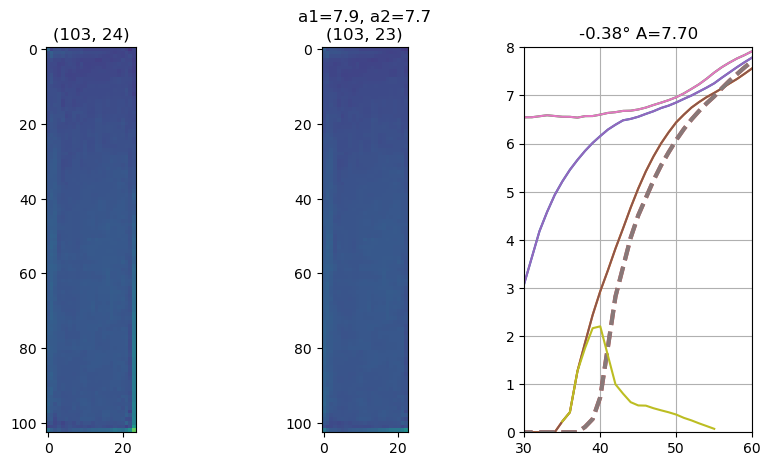

In [5]:
il.reload(bs)
fpath = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-21-53_C50.jpg"
dict_fpath = "dicts/hist_2023-06-26_06-21-53_C50.dill"

tup = ("a", "6")
ccia = bs.CavityCarrierImageAnalyzier(fpath)
cell = ccia.get_corrected_cell(*tup)
_, h1 = bs.get_symlog_hist(fpath, delta=1, *tup)


he = bs.HistEvaluation()

# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)

dc = Container()
he.evaluate_cell(fpath, tup, hist_dict, dc, plot="show", force_plot=True)

dc.criticality_container.score ##:

q = dc.q

plt.plot(dc.q.ii, dc.q.mid)
plt.plot(dc.q.ii, dc.q.lower)
plt.plot(dc.q.ii, dc.q.upper)
plt.plot(dc.q.ii, dc.cell_hist, alpha=0.9, lw=3, ls="--")
plt.plot(dc.q.ii[dc.mask1*dc.dark_mask], dc.diff1_dark)
plt.axis([30, 60, 0, 8])
plt.grid()

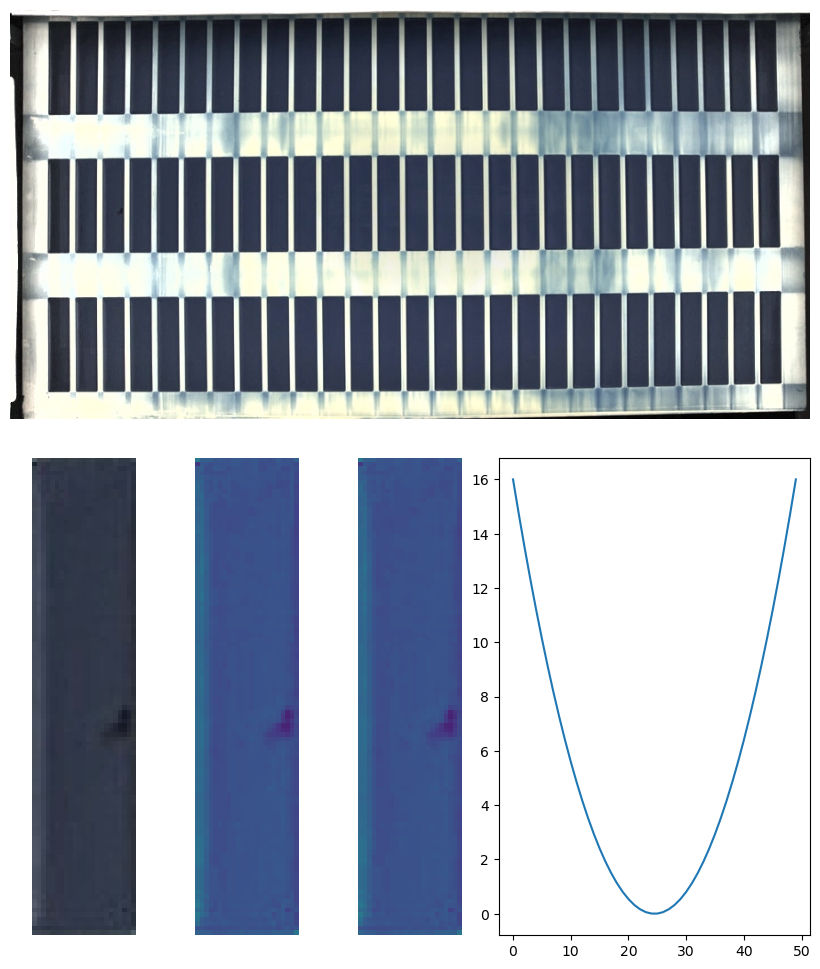

In [18]:

from matplotlib.gridspec import GridSpec
CavityCarrierImageAnalyzier = bs.CavityCarrierImageAnalyzier

il.reload(bs)


fpath = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg"

ccia = CavityCarrierImageAnalyzier(fpath)

fig = plt.figure(figsize=(10, 12))
gs = GridSpec(2, 5, figure=fig)
ax0 = fig.add_subplot(gs[0, :])
ax0.imshow(ccia.img)
ax0.axis("off")


cell_key = ("b", "3")
cell_rgb = ccia.get_raw_cell(*cell_key, rgb=True)

ax1 = fig.add_subplot(gs[1, 0])
ax1.imshow(cell_rgb)
ax1.axis("off")

cell_mono = ccia.get_raw_cell(*cell_key)

ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(cell_mono, **vv)
ax2.axis("off")

corrected_cell = ccia.get_corrected_cell(*cell_key)

ax3 = fig.add_subplot(gs[1, 2])
ax3.imshow(corrected_cell, **vv)
ax3.axis("off")

plt.subplots_adjust(
    left=0.1,
    bottom=0.1, 
    right=0.9, 
    top=0.9, 
    wspace=0.1, 
    hspace=0.01
)


ax4 = fig.add_subplot(gs[1, 3:])

ax4.plot(np.linspace(-4, 4)**2)



/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg ('b', '3') 21.946803885578127


(dc.criticality_container.score) := 21.946803885578127

---

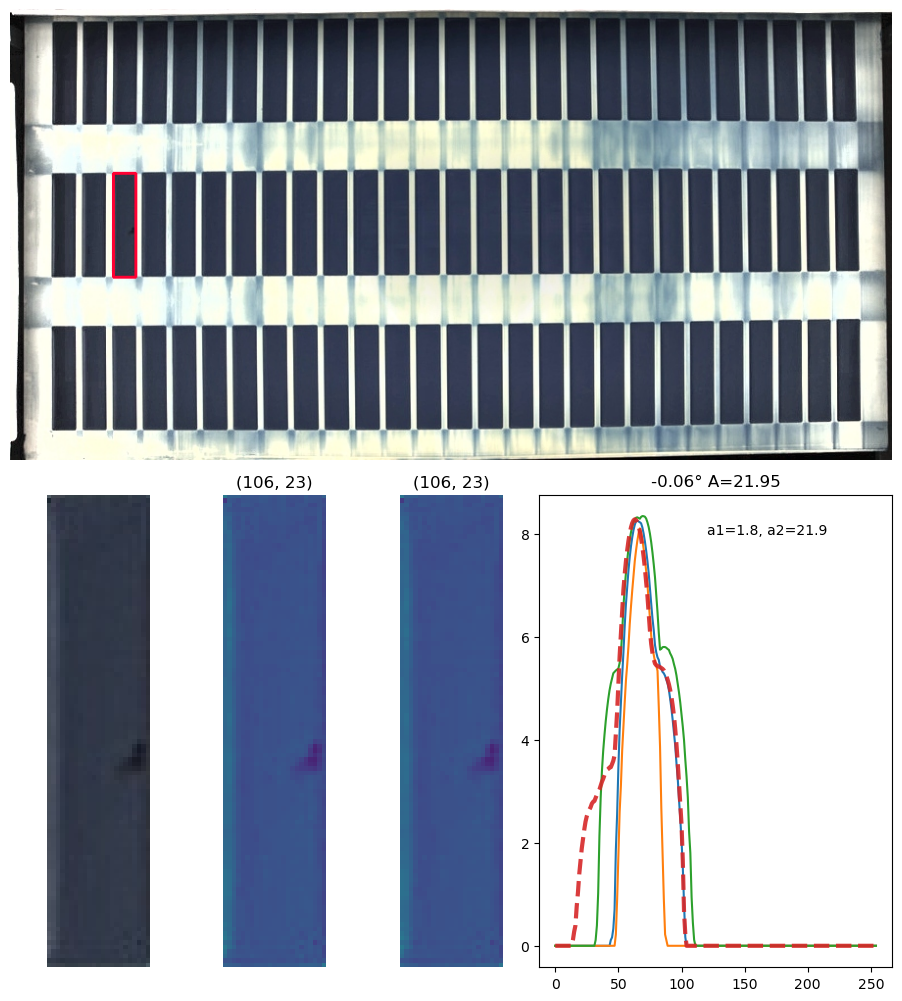

In [45]:
il.reload(bs)
fpath = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg"
dict_fpath = "dicts/hist_2023-06-26_06-19-58_C50.dill"

tup = ("b", "3")
ccia = bs.CavityCarrierImageAnalyzier(fpath)
cell = ccia.get_corrected_cell(*tup)
_, h1 = bs.get_symlog_hist(fpath, delta=1, *tup)


he = bs.HistEvaluation()

# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)

dc = Container()
he.evaluate_cell(fpath, tup, hist_dict, dc, plot="show")

dc.criticality_container.score ##:


In [44]:
plt.subplots_adjust?

displaytools detected a SyntaxError in the original cell



In [9]:
# old code from September 2023

## Check angle plausibility

/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg ('a', '24') 41.97314879963159


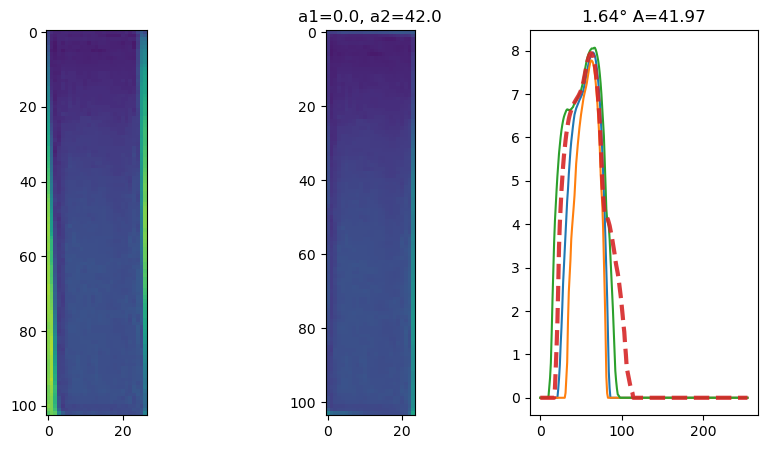

In [95]:
basename = "2023-06-26_06-19-14_C50"
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"


dict_fpath = f"dicts/hist_{basename}.dill"
tup = ("a", "24")
ccia = bs.CavityCarrierImageAnalyzier(fpath)
cell = ccia.get_corrected_cell(*tup)
_, h1 = bs.get_symlog_hist(fpath, delta=1, *tup)


he = bs.HistEvaluation()

# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)

dc = Container()
he.evaluate_cell(fpath, tup, hist_dict, dc, plot="show")


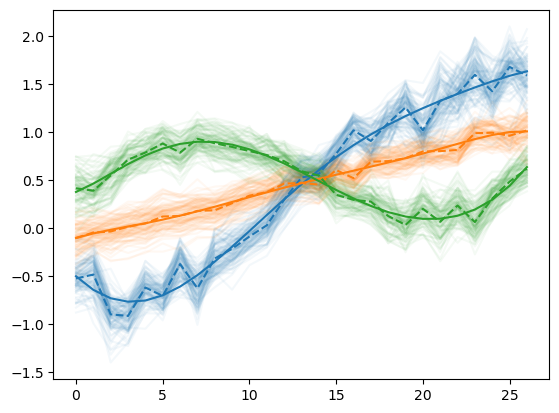

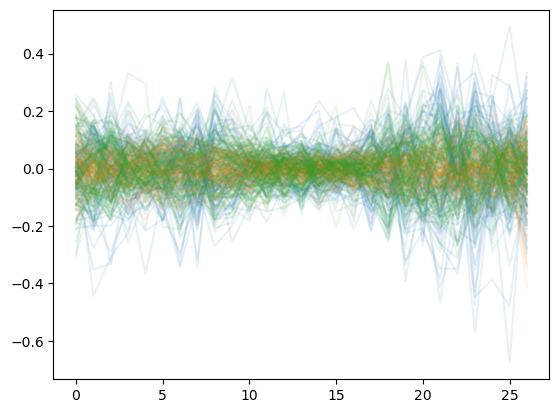

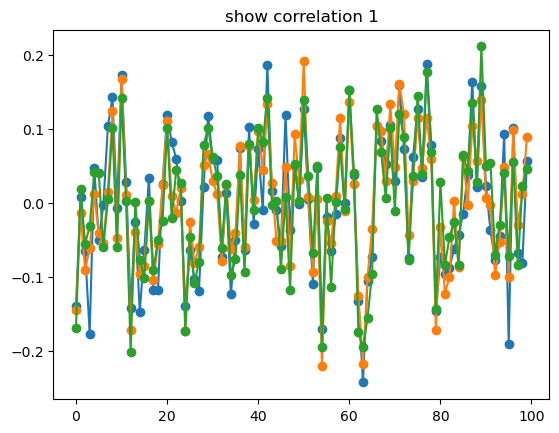

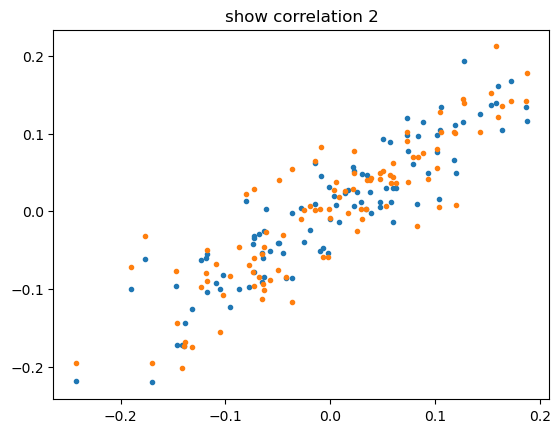

In [171]:
il.reload(bs)
        
            

aa = bs.AngleAnalyzer()
aa.process_all_dicts(alpha=0.05)
aa.fit_curves()
plt.figure()
aa.check_offset()

## Interrim Summary:

Angles are a fuction like $\varphi = F_k(\mathrm{row}, \mathrm{offset})$, where $k$ is the row index. The offset can be estimated by `get_angle_offset_for_img`

In [172]:
aa.polys

{'a': poly1d([-7.22982549e-08,  5.53847100e-06, -1.32365700e-04,  2.99624634e-04,
         2.70443163e-02, -1.69031733e-01, -5.02195668e-01]),
 'b': poly1d([-7.04787926e-08,  5.26906776e-06, -1.46765224e-04,  1.84460166e-03,
        -9.64805648e-03,  5.57276986e-02, -1.03538857e-01]),
 'c': poly1d([ 5.69251395e-08, -5.61693692e-06,  2.21074873e-04, -3.69997997e-03,
         1.70117584e-02,  7.36880976e-02,  3.76343347e-01])}

(cell.angle) := 0.7233988963084774

---

(cell.angle) := 1.1662969851879774

---

(cell.angle) := 1.212308129055543

---

(cell.angle) := 1.249983864366064

---

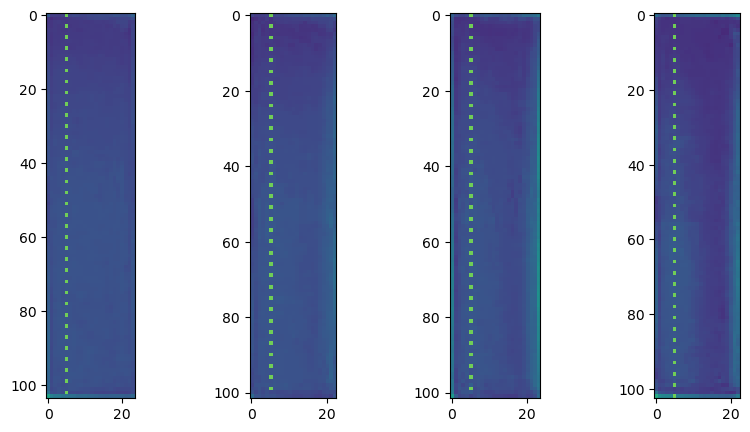

In [220]:
# test new version of get corrected_cell

il.reload(bs)

# _a27
basename = "2023-06-26_06-18-06_C50"
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"


ccia = bs.CavityCarrierImageAnalyzier(img_fpath)


cells = []


ii = [18, 25, 26, 27]

# ii = [1, 2, 3]


fig, axes = plt.subplots(1, len(ii), figsize=(10, 5))
for j, i in enumerate(ii):
    cell = ccia.get_corrected_cell("a", str(i), force_angle=None, cut_to_bb=True)
    cells.append(cell)
    cell.angle ##:
    
    cell[::3, 5] = 200
    axes[j].imshow(cell, **vv)
    



In [211]:
bs.aa.fitted_angles[("a", "3")]

-0.7316301185085614

In [214]:
ccia.angle_offset ##:

bs.aa.fitted_angles[("a", "2")] + ccia.angle_offset 

(ccia.angle_offset) := -0.05703724715069515

---

-0.7010476066535235

(cell.angle) := -0.5818183378366515

---

(cell.angle) := -0.6952700908966862

---

(cell.angle) := -0.7653658981012728

---

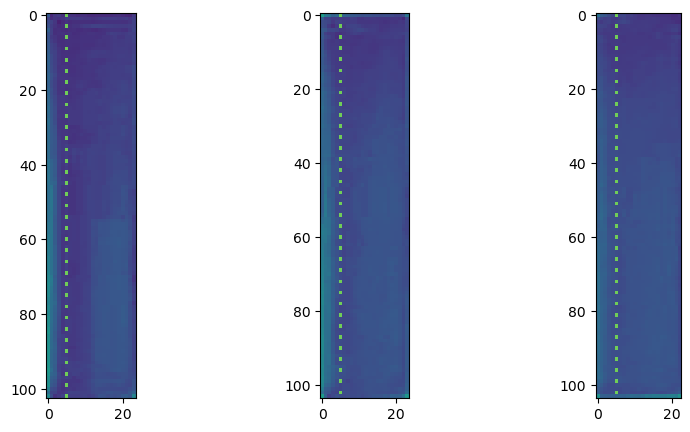

In [225]:
il.reload(bs)

# _a27
basename = "2023-06-26_06-18-31_C50"  # a24

basename = "2023-06-26_06-18-47_C50" # a3
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"


ccia = bs.CavityCarrierImageAnalyzier(img_fpath)


cells = []


ii = [24, 25, 26, 27]

ii = [1, 2, 3]


fig, axes = plt.subplots(1, len(ii), figsize=(10, 5))
for j, i in enumerate(ii):
    cell = ccia.get_corrected_cell("a", str(i), force_angle=None, cut_to_bb=True)
    cells.append(cell)
    cell.angle ##:
    
    cell[::3, 5] = 200
    axes[j].imshow(cell, **vv)

avg=52.10282436010591 std=15.70169504721567 avg_left=65.47619047619048 avg_right=57.31428571428572
/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-25_C50.jpg ('a', '4') 5.008479437414961
avg=52.10282436010591 std=15.70169504721567 avg_left=65.47619047619048 avg_right=57.31428571428572


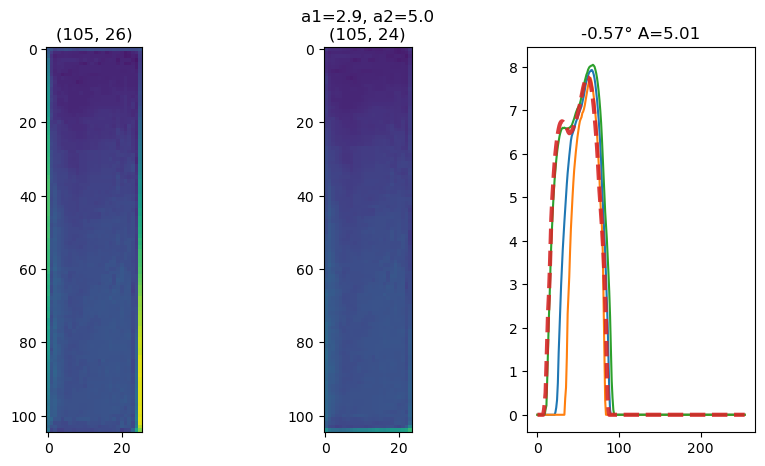

In [294]:
il.reload(bs)

basename = "2023-06-26_06-19-25_C50" # a4
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"



dict_fpath = f"dicts/hist_{basename}.dill"
# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)



tup = tuple("a 4".split())
bs.aa.available = True

he = bs.HistEvaluation()
he.evaluate_cell(img_fpath, tup, hist_dict, dc, plot="show", force_plot=True, recalc_hist=True)

info(hist) := "<class 'numpy.ndarray'> with shape: (255,)"

---

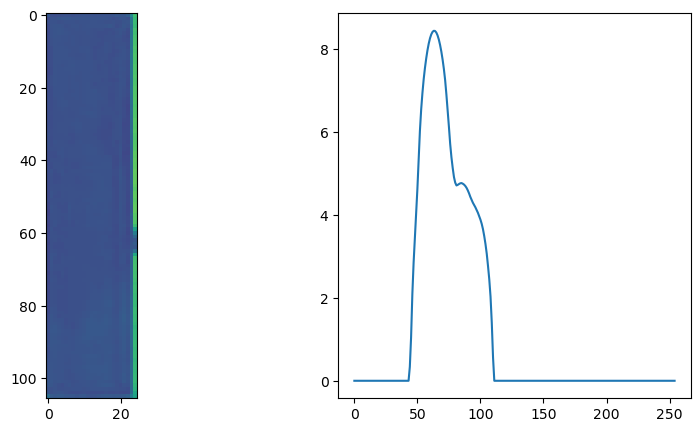

In [292]:
il.reload(bs)
basename = "2023-06-26_06-27-52_C50" # a4
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"

ccia = bs.CavityCarrierImageAnalyzier(img_fpath)

tup = ("b", "19")
cell = ccia.get_raw_cell(*tup)
ccell = ccia.get_corrected_cell(*tup)

hist = bs.get_symlog_hist_from_cell(ccell[:, :], delta=1)[1] ##:i

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


axes[0].imshow(ccell, **vv)
axes[1].plot(hist)
pass




In [298]:
il.reload(bs)
basename = "2023-06-26_06-18-01_C50" # a4
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"

ccia = bs.CavityCarrierImageAnalyzier(img_fpath)

tup = ("a", "8")
cell = ccia.get_raw_cell(*tup)
ccell = ccia.get_corrected_cell(*tup) ##:

if 0:
    hist = bs.get_symlog_hist_from_cell(ccell[:, :], delta=1)[1] ##:i

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))


    axes[0].imshow(ccell, **vv)
    axes[1].plot(hist)
    pass

ccell := Attr_Array([[58, 46, 49, ..., 53, 49, 43],
            [45, 53, 51, ..., 63, 59, 50],
            [46, 51, 46, ..., 61, 58, 55],
            ...,
            [69, 69, 71, ..., 60, 61, 58],
            [69, 67, 66, ..., 58, 60, 60],
            [82, 59, 63, ..., 75, 80, 94]], dtype=uint8)

---